### Diagnositics for a flock of particels

When a group of particles, or trajectories, join together is space, they can be considered a ''flock''. Such clusters have specific diagnostics and spatial temporal statistics, of which some are shown below. 

### 0. Import of libraries

General libraries are imported, but also the specific functions which are situated in this folder


In [1]:
import os
import time

import netCDF4 as nc

import cartopy
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from Functions.flock_measures import mediod, center_of_mass_displacement, frechet_dist, normalized_cumulative_lagrangian_separation, center_of_mass_spread, cumulative_incremental_trajectory_error, relative_horizontal_transport_deviation

print(time.ctime(time.time()))

Wed Jun  7 11:46:52 2023


### 1. Load the data
load the toy data:

In [2]:
fn = 'toy_data_01.nc'
ds = nc.Dataset(os.path.join(os.pardir, 'Simulations', fn))

lat, lon = ds['lat'][:], ds['lon'][:]
tim, id = ds['time'][:], ds['trajectory'][:]

### 2. Calculate flock properties

The toy data example consist of parcels that are released at the same time, within an square box. As time progresses these parcels create trajectories. One trajectory which might describe the general trajectory best is the [medoid](https://en.wikipedia.org/wiki/Medoid). In respect to all others, this spatial temporal path has the least separation distance, along the whole timespan. It can be calculated in the following way:

In [3]:
id = mediod(lon.data, lat.data, spherical=True)

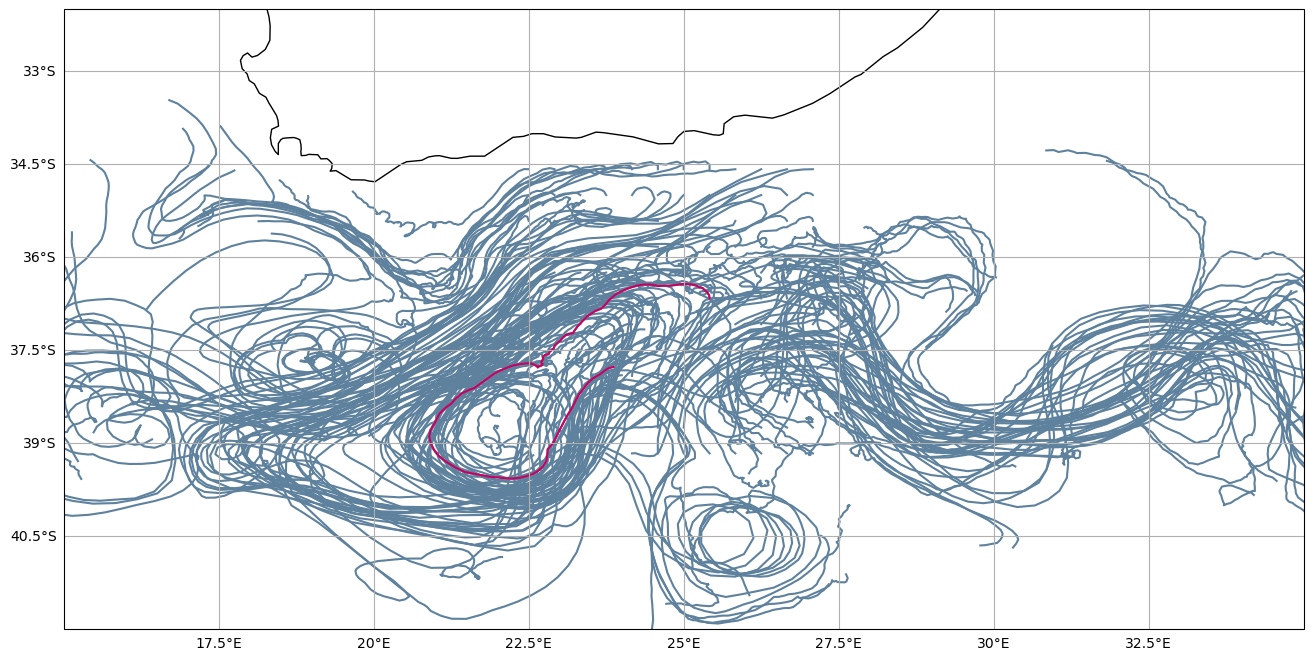

In [4]:
fig = plt.figure(figsize=(16,17)) #(17,5)
ax1 = plt.subplot(111, projection=cartopy.crs.PlateCarree())
    
ax1.coastlines(resolution='50m')
ax1.plot(lon.data.T, lat.data.T, transform=cartopy.crs.PlateCarree(), color='xkcd:greyish blue')
ax1.plot(lon.data[id,...], lat.data[id,...], transform=cartopy.crs.PlateCarree(), color='xkcd:deep pink')
ax1.set_xlim([15, 35])
ax1.set_ylim([-42, -32])
gl = ax1.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()

A similar spatial temporal group statistic is the . Here the 

In [5]:
a,b = center_of_mass_displacement(lon.data, lat.data)

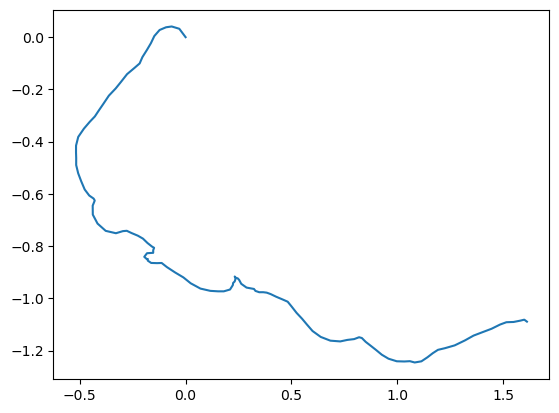

In [6]:
plt.plot(a,b)
plt.show();

In [7]:
c = normalized_cumulative_lagrangian_separation(lon.data, lat.data,
                                                leader_id=id, spherical=True)

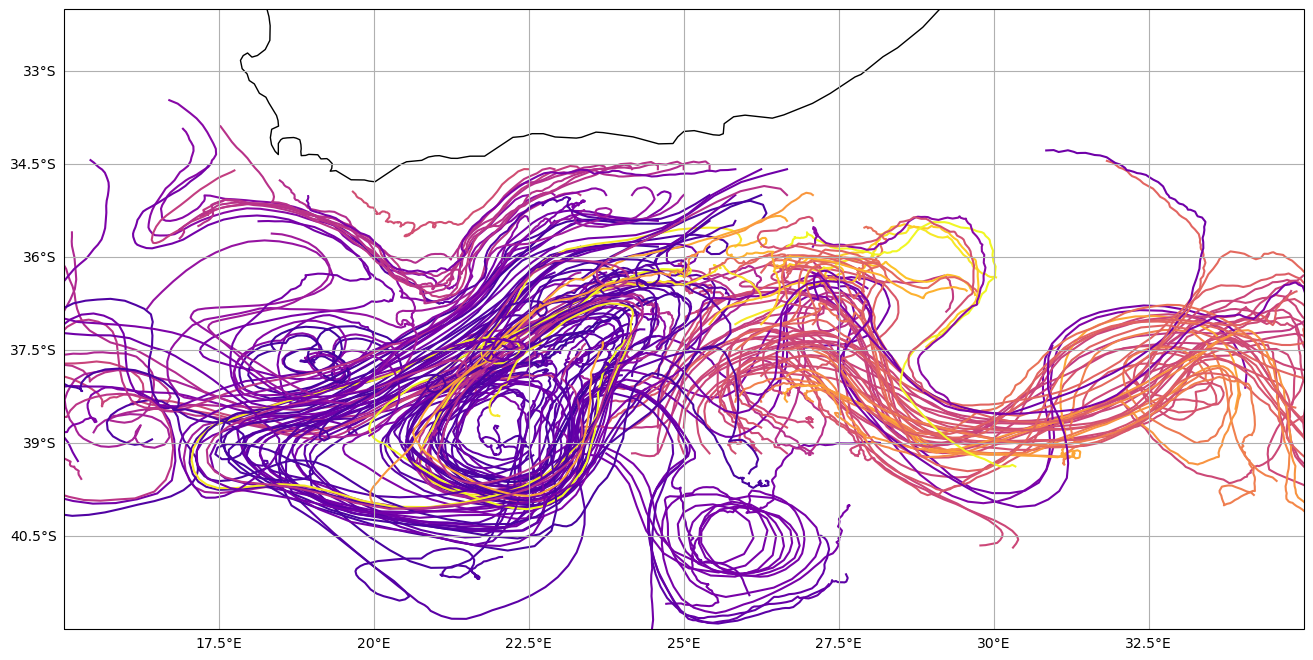

In [8]:
fig = plt.figure(figsize=(16,17)) #(17,5)
ax1 = plt.subplot(111, projection=cartopy.crs.PlateCarree())
    
ax1.coastlines(resolution='50m')
for i in range(lat.shape[0]-1):
    ax1.plot(lon.data[i,:], lat.data[i,:], 
             color=plt.cm.plasma((c[i]+c.min())/c.ptp()))
ax1.set_xlim([15, 35])
ax1.set_ylim([-42, -32])
gl = ax1.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()